In [2]:
import pandas as pd
import numpy as np

In [3]:
#读取train.csv
dataset = pd.read_csv('../Datasets/titanic/train.csv')

train.csv中的特征当中，认为'PassengerId'、'Name'、'Ticket'对该人员是否获救无关，故不再考虑以上特征。

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset = dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
#Survived:是否获救 1 or 0
#Pclass:客舱等级 1=1等舱；2=2等舱；3=3等舱
#Sex:乘客性别 1 or 0
#Age:乘客年龄
#SibSp:在船的兄弟姐妹数量
#Parch:在船的父母数量
#Fare:船票价格
#Cabin:客舱号
#Embarked:登船港口

In [6]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [7]:
#对于数据空白（NaN）的情况，采用自动填充为平均值的方法，将该列平均值填入空白处。
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [8]:
#对于Cabin数值化，返回一个元组，元组的第一项就是数值化后的值
dataset['Cabin'] = pd.factorize(dataset.Cabin)[0]

In [9]:
#对于其他所有的NaN值，填充为0
dataset.fillna(0,inplace = True)

In [10]:
#把Sex数值化为1 or 0
dataset['Sex'] = [1 if x=='male' else 0 for x in dataset.Sex]

In [11]:
#对于Pclass进行处理，若直接使用1，2，3来指代Pclass的话，会引入一种线性关系（2等票等于1等票的两倍，3等票等于1等票的三倍）
#使用类似于独立编码的形式，astype改变数据类型，会把true改为1，false改为0
dataset['p1'] = np.array(dataset['Pclass'] == 1).astype(np.int32)
dataset['p2'] = np.array(dataset['Pclass'] == 2).astype(np.int32)
dataset['p3'] = np.array(dataset['Pclass'] == 3).astype(np.int32)

In [12]:
#删除Pclass
del dataset['Pclass']

In [13]:
dataset.Embarked.unique()

array(['S', 'C', 'Q', 0], dtype=object)

In [14]:
#类似于Pclass的处理方法
dataset['e1'] = np.array(dataset['Embarked'] == 'S').astype(np.int32)
dataset['e2'] = np.array(dataset['Embarked'] == 'C').astype(np.int32)
dataset['e3'] = np.array(dataset['Embarked'] == 'Q').astype(np.int32)

In [15]:
#删除Embarked
del dataset['Embarked']

In [16]:
dataset.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'p1', 'p2',
       'p3', 'e1', 'e2', 'e3'],
      dtype='object')

In [17]:
#891行，12列
data_train = dataset[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'p1', 'p2','p3', 'e1', 'e2', 'e3']]

In [18]:
#891行，1列
data_target = dataset['Survived'].values.reshape(len(dataset),1)

In [19]:
np.shape(data_train), np.shape(data_target)

((891, 12), (891, 1))

In [20]:
import tensorflow as tf

In [21]:
#两个数据输入点，x是train数据，y是target数据
x = tf.placeholder("float", shape = [None,12])
y = tf.placeholder("float", shape = [None,1])

In [22]:
#weight权重，output是矩阵相乘，pred是使用sigmoid进行运算，使用cast方法将bool值变为float32类型
weight = tf.Variable(tf.random_normal([12,1]))
bias = tf.Variable(tf.random_normal([1]))
output = tf.matmul(x,weight) + bias
pred = tf.cast(tf.sigmoid(output)>0.5, tf.float32)


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
#交叉熵，labels是目标值，logits是output，通过sigmoid函数与y进行比较
#ruduce_mean,把向量值变为标量值
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = output))

In [24]:
#梯度下降，下降速率是0.0003，最小化loss
train_step = tf.train.GradientDescentOptimizer(0.0003).minimize(loss)

In [25]:
#正确率
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,y), tf.float32))

In [26]:
#处理test数据集
data_test = pd.read_csv('../Datasets/titanic/test.csv')
data_test = data_test[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].mean())
data_test['Cabin'] = pd.factorize(data_test.Cabin)[0]
data_test.fillna(0,inplace = True)
data_test['Sex'] = [1 if x=='male' else 0 for x in data_test.Sex]
data_test['p1'] = np.array(data_test['Pclass'] == 1).astype(np.int32)
data_test['p2'] = np.array(data_test['Pclass'] == 2).astype(np.int32)
data_test['p3'] = np.array(data_test['Pclass'] == 3).astype(np.int32)
data_test['e1'] = np.array(data_test['Embarked'] == 'S').astype(np.int32)
data_test['e2'] = np.array(data_test['Embarked'] == 'C').astype(np.int32)
data_test['e3'] = np.array(data_test['Embarked'] == 'Q').astype(np.int32)
del data_test['Pclass']
del data_test['Embarked']

In [27]:
data_test

,Sex,Age,SibSp,Parch,Fare,Cabin,p1,p2,p3,e1,e2,e3
0,1,34.50000,0,0,7.8292,-1,0,0,1,0,0,1
1,0,47.00000,1,0,7.0000,-1,0,0,1,1,0,0
2,1,62.00000,0,0,9.6875,-1,0,1,0,0,0,1
3,1,27.00000,0,0,8.6625,-1,0,0,1,1,0,0
4,0,22.00000,1,1,12.2875,-1,0,0,1,1,0,0
5,1,14.00000,0,0,9.2250,-1,0,0,1,1,0,0
6,0,30.00000,0,0,7.6292,-1,0,0,1,0,0,1
7,1,26.00000,1,1,29.0000,-1,0,1,0,1,0,0
8,0,18.00000,0,0,7.2292,-1,0,0,1,0,1,0
9,1,21.00000,2,0,24.1500,-1,0,0,1,1,0,0


In [28]:
#为了把预测与乘客实际是否获救进行比对，读入gender_submission
test_label = pd.read_csv('../Datasets/titanic/gender_submission.csv')
test_label = np.reshape(test_label.Survived.values.astype(np.float32),(418,1))


In [29]:
#初始化
sess = tf.Session()
sess.run(tf.global_variables_initializer())
#存放每过1000步的loss，train的准确率，test的准确率
loss_train = []
train_acc = []
test_acc = []

In [30]:
#25000个epoch的训练
for i in range(25000):
    #为了防止过拟合，将训练数据进行乱序处理
    index = np.random.permutation(len(data_target))
    data_train = pd.DataFrame(data_train)
    data_train.iloc[index]
    data_target = pd.DataFrame(data_target)
    data_target.iloc[index]
    #每次送100个数据进去
    for n in range(len(data_target)//100 + 1):
        batch_xs = data_train[n*100:n*100+100]
        batch_ys = data_target[n*100:n*100+100]
        sess.run(train_step,feed_dict = {x:batch_xs,y:batch_ys})
    #每1000步计算一下loss，train_acc，test_acc
    if i%1000 == 0:
        loss_temp = sess.run(loss,feed_dict = {x:batch_xs,y:batch_ys})
        loss_train.append(loss_temp)
        train_acc_temp = sess.run(accuracy,feed_dict = {x:batch_xs,y:batch_ys})
        train_acc.append(train_acc_temp)
        test_acc_temp = sess.run(accuracy,feed_dict = {x:data_test,y:test_label})
        test_acc.append(test_acc_temp)
        print(loss_temp,train_acc_temp,test_acc_temp)

13.145937 0.7032967 0.5861244
0.6659231 0.74725276 0.7200957
0.6277186 0.72527474 0.7320574
0.5966435 0.74725276 0.74880385
0.57054836 0.74725276 0.7679426
0.5483476 0.74725276 0.78708136
0.52936006 0.72527474 0.81100476
0.5130862 0.71428573 0.8301435
0.49912393 0.71428573 0.84210527
0.4871356 0.72527474 0.8564593
0.47683498 0.72527474 0.8660287
0.46797705 0.73626375 0.8779904
0.46035162 0.7582418 0.8971292
0.45377877 0.7692308 0.9282297
0.4481065 0.7692308 0.93301433
0.44320154 0.7802198 0.93301433
0.43895337 0.7912088 0.9354067
0.4352688 0.7802198 0.9449761
0.43206692 0.7802198 0.9449761
0.4292792 0.7912088 0.94736844
0.42684418 0.8021978 0.94736844
0.4247194 0.8021978 0.94736844
0.42285582 0.8021978 0.9497608
0.4212197 0.8021978 0.9521531
0.41978186 0.8021978 0.95454544


In [31]:
import matplotlib.pyplot as plt

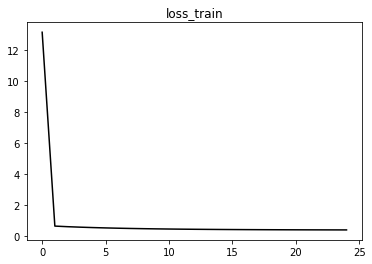

In [32]:
#可视化
plt.plot(loss_train,'k-')
plt.title('loss_train')
plt.show()

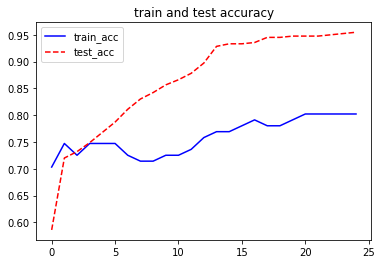

In [33]:
#比对train_acc，test_acc
plt.plot(train_acc,'b-',label = 'train_acc')
plt.plot(test_acc,'r--',label = 'test_acc')
plt.title("train and test accuracy")
plt.legend()
plt.show()